In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}={val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05628, saving model to ./model/01=0.0563.hdf5

Epoch 00002: val_loss improved from 0.05628 to 0.04058, saving model to ./model/02=0.0406.hdf5

Epoch 00003: val_loss improved from 0.04058 to 0.03349, saving model to ./model/03=0.0335.hdf5

Epoch 00004: val_loss did not improve from 0.03349

Epoch 00005: val_loss improved from 0.03349 to 0.03262, saving model to ./model/05=0.0326.hdf5

Epoch 00006: val_loss improved from 0.03262 to 0.02941, saving model to ./model/06=0.0294.hdf5

Epoch 00007: val_loss improved from 0.02941 to 0.02909, saving model to ./model/07=0.0291.hdf5

Epoch 00008: val_loss did not improve from 0.02909

Epoch 00009: val_loss improved from 0.02909 to 0.02882, saving model to ./model/09=0.0288.hdf5

Epoch 00010: val_loss did not improve from 0.02882

Epoch 00011: val_loss improved from 0.02882 to 0.02617, saving model to ./model/11=0.0262.hdf5

Epoch 00012: val_loss improved from 0.02617 to 0.02457, saving model to ./model

In [8]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 4s 392us/step

 Test Accuracy: 0.9937


In [9]:
y_vloss = history.history['val_loss']
y_loss=history.history['loss']

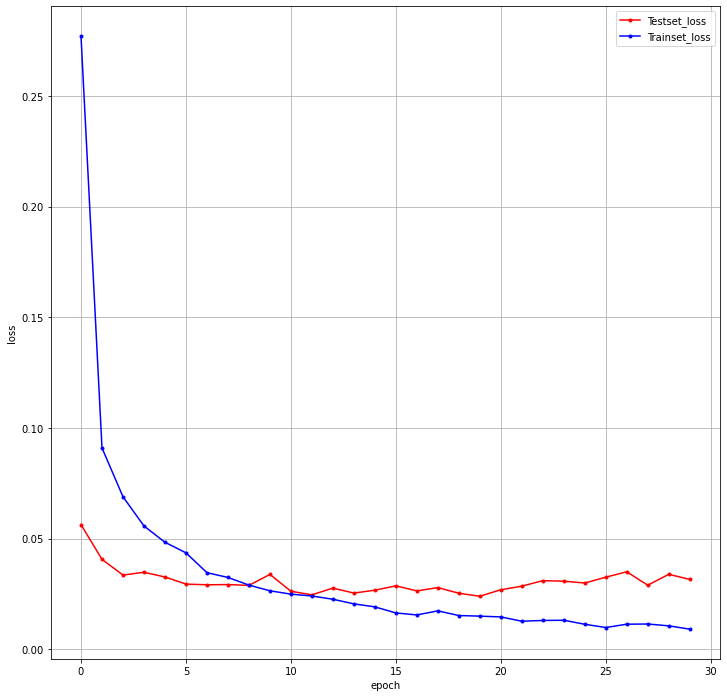

In [10]:
x_len = numpy.arange(len(y_loss))
plt.figure(figsize=(12, 12))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()